In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats as st
from sklearn.externals import joblib
%matplotlib inline

/root/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
data = pd.read_csv('../dataset/01_training_set_cleaned.csv')
data.head()

,Current_inventory,Transit_time,Forecast_sales_3_months,Forecast_sales_6_months,Forecast_sales_9_months,Sales_quantity_1_months,Sales_quantity_3_months,Sales_quantity_6_months,Sales_quantity_9_months,Minimum_recommended_stock,Source_issue_identifying,Source_performance_6_months,Source_performance_12_months,Flag_deck_risk,Flag_oe_constraint,Flag_ppap_risk,Flag_stop_auto_buy,Flag_rev_stop,Backordered
0,0,8.0,0,0,0,0,0,0,0,0,No,0.88,0.87,No,No,No,Yes,No,No
1,2,9.0,0,0,0,0,0,0,0,0,No,0.99,0.99,No,No,No,Yes,No,No
2,2,8.0,0,0,0,0,0,0,0,0,No,0.88,0.87,Yes,No,No,Yes,No,No
3,7,8.0,0,0,0,0,0,0,0,1,No,0.10,0.13,No,No,No,Yes,No,No
4,8,8.0,0,0,0,0,0,0,4,2,No,0.88,0.87,Yes,No,No,Yes,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987847 entries, 0 to 987846
Data columns (total 19 columns):
Current_inventory               987847 non-null int64
Transit_time                    987847 non-null float64
Forecast_sales_3_months         987847 non-null int64
Forecast_sales_6_months         987847 non-null int64
Forecast_sales_9_months         987847 non-null int64
Sales_quantity_1_months         987847 non-null int64
Sales_quantity_3_months         987847 non-null int64
Sales_quantity_6_months         987847 non-null int64
Sales_quantity_9_months         987847 non-null int64
Minimum_recommended_stock       987847 non-null int64
Source_issue_identifying        987847 non-null object
Source_performance_6_months     987847 non-null float64
Source_performance_12_months    987847 non-null float64
Flag_deck_risk                  987847 non-null object
Flag_oe_constraint              987847 non-null object
Flag_ppap_risk                  987847 non-null object
Flag_stop_auto_

In [5]:
data.shape

(987847, 19)

In [6]:
data.head(10)

,Current_inventory,Transit_time,Forecast_sales_3_months,Forecast_sales_6_months,Forecast_sales_9_months,Sales_quantity_1_months,Sales_quantity_3_months,Sales_quantity_6_months,Sales_quantity_9_months,Minimum_recommended_stock,Source_issue_identifying,Source_performance_6_months,Source_performance_12_months,Flag_deck_risk,Flag_oe_constraint,Flag_ppap_risk,Flag_stop_auto_buy,Flag_rev_stop,Backordered
0,0,8.0,0,0,0,0,0,0,0,0,No,0.88,0.87,No,No,No,Yes,No,No
1,2,9.0,0,0,0,0,0,0,0,0,No,0.99,0.99,No,No,No,Yes,No,No
2,2,8.0,0,0,0,0,0,0,0,0,No,0.88,0.87,Yes,No,No,Yes,No,No
3,7,8.0,0,0,0,0,0,0,0,1,No,0.10,0.13,No,No,No,Yes,No,No
4,8,8.0,0,0,0,0,0,0,4,2,No,0.88,0.87,Yes,No,No,Yes,No,No
5,13,8.0,0,0,0,0,0,0,0,0,No,0.82,0.87,No,No,No,Yes,No,No
6,1095,8.0,0,0,0,0,0,0,0,4,No,0.88,0.87,Yes,No,No,Yes,No,No
7,6,2.0,0,0,0,0,0,0,0,0,No,0.00,0.00,Yes,No,Yes,Yes,No,No
8,140,8.0,15,114,152,0,0,0,0,0,No,0.88,0.87,No,No,No,Yes,No,No
9,4,8.0,0,0,0,0,0,0,0,0,No,0.82,0.87,No,No,No,Yes,No,No


In [7]:
sourceperf_corr_data = data[['Source_performance_6_months','Source_performance_12_months']]
sourceperf_corr = sourceperf_corr_data.corr()
sourceperf_corr

,Source_performance_6_months,Source_performance_12_months
Source_performance_6_months,1.000000,0.936737
Source_performance_12_months,0.936737,1.000000


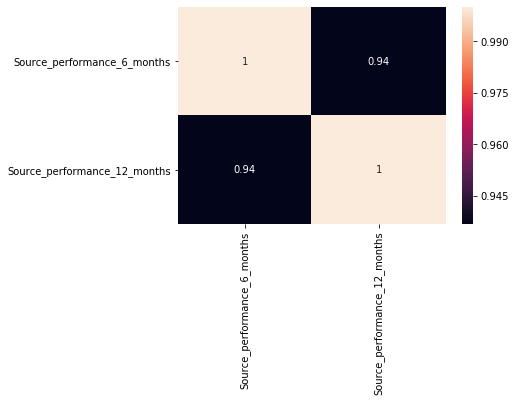

In [8]:
_ = sns.heatmap(sourceperf_corr, annot=True)

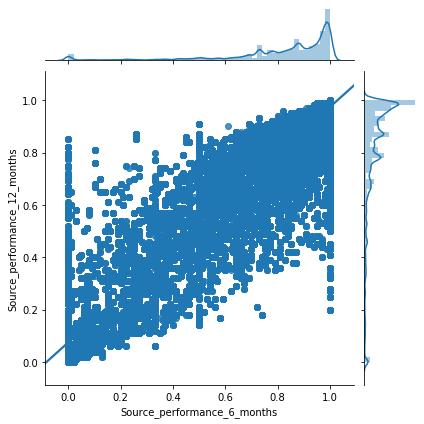

In [9]:
_=sns.jointplot('Source_performance_6_months',
                'Source_performance_12_months',
                data=data,
                kind='reg')

We can see that, as expected, performace over 6 and 12 month periods are highly correlated too.

In [10]:
sales_corr_data = data[['Sales_quantity_1_months',
                        'Sales_quantity_3_months',
                        'Sales_quantity_6_months',
                        'Sales_quantity_9_months']]
sales_corr = sales_corr_data.corr()
sales_corr

,Sales_quantity_1_months,Sales_quantity_3_months,Sales_quantity_6_months,Sales_quantity_9_months
Sales_quantity_1_months,1.000000,0.908402,0.870892,0.832163
Sales_quantity_3_months,0.908402,1.000000,0.988814,0.955198
Sales_quantity_6_months,0.870892,0.988814,1.000000,0.973348
Sales_quantity_9_months,0.832163,0.955198,0.973348,1.000000


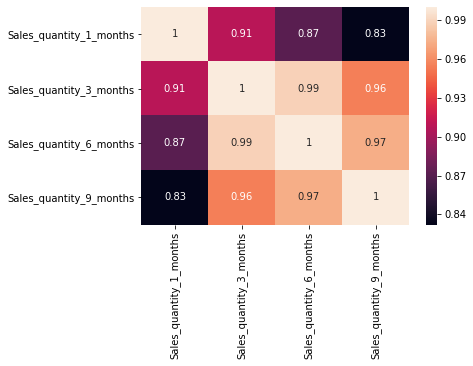

In [11]:
_=sns.heatmap(sales_corr, annot=True)

Similarly, these prior sales over the periods of 3, 6 and 9 months are highly correlated.

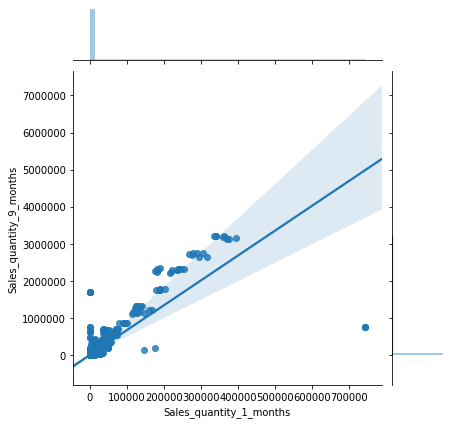

In [12]:
_=sns.jointplot('Sales_quantity_1_months',
                'Sales_quantity_9_months',
                data=data,
                kind='reg')

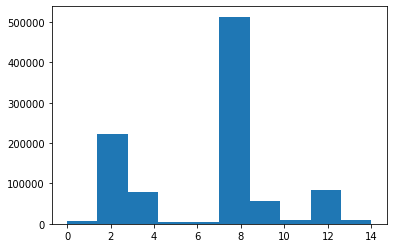

In [13]:
_ = plt.hist(data.Transit_time)

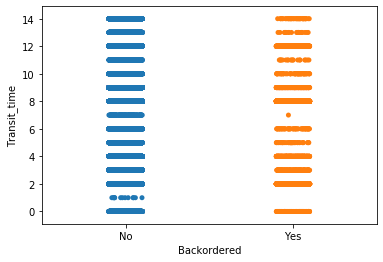

In [14]:
sns.stripplot(x='Backordered',
              y='Transit_time', 
              data=data,
              jitter=True);

Text(0, 0.5, 'Current Inventory (unit)')

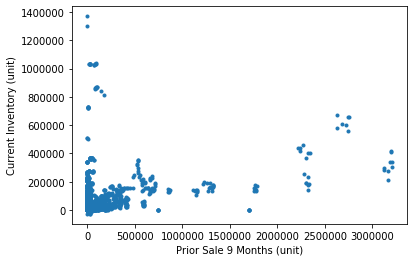

In [15]:
plt.plot(data.Sales_quantity_9_months, data.Current_inventory, marker='.', linestyle='None')
plt.xlabel('Prior Sale 9 Months (unit)')
plt.ylabel('Current Inventory (unit)')

It would be interesting to find out why the current inventory for some products is as high as 1.4 Million even when there is no sale in prior 9 months. This could even be a question to client. It could be a bad data as well.

Text(0, 0.5, 'Minimum Recommended Stock (unit)')

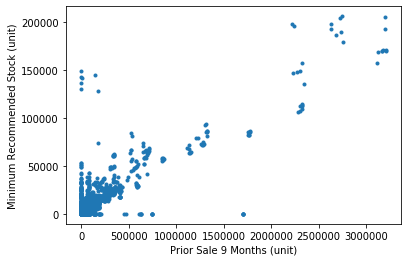

In [16]:
plt.plot(data.Sales_quantity_9_months, data.Minimum_recommended_stock, marker='.', linestyle='None')
plt.xlabel('Prior Sale 9 Months (unit)')
plt.ylabel('Minimum Recommended Stock (unit)')

## Relations with Backordered

In [17]:
dat = data.copy()

In [18]:
dat = dat.replace("Yes", 1)
dat = dat.replace("No", 0)

In [19]:
dat.head()

,Current_inventory,Transit_time,Forecast_sales_3_months,Forecast_sales_6_months,Forecast_sales_9_months,Sales_quantity_1_months,Sales_quantity_3_months,Sales_quantity_6_months,Sales_quantity_9_months,Minimum_recommended_stock,Source_issue_identifying,Source_performance_6_months,Source_performance_12_months,Flag_deck_risk,Flag_oe_constraint,Flag_ppap_risk,Flag_stop_auto_buy,Flag_rev_stop,Backordered
0,0,8.0,0,0,0,0,0,0,0,0,0,0.88,0.87,0,0,0,1,0,0
1,2,9.0,0,0,0,0,0,0,0,0,0,0.99,0.99,0,0,0,1,0,0
2,2,8.0,0,0,0,0,0,0,0,0,0,0.88,0.87,1,0,0,1,0,0
3,7,8.0,0,0,0,0,0,0,0,1,0,0.10,0.13,0,0,0,1,0,0
4,8,8.0,0,0,0,0,0,0,4,2,0,0.88,0.87,1,0,0,1,0,0


I predict that Flag_deck_risk, Flag_ppap_risk, Flag_stop_auto_buy, Flag_oe_constraint, Flag_rev_stop, Source_issue_identifying have some realtions with Backordered. 

We will find out using **crosstabulation and chi-square**

For a chi-square test for association, the hypotheses are as follows:

**Ho==> Features are indepnedent, no association between variables exists.**

**H1==> Features are not independent; an association between variables exist.**


In [20]:
dat.head()

,Current_inventory,Transit_time,Forecast_sales_3_months,Forecast_sales_6_months,Forecast_sales_9_months,Sales_quantity_1_months,Sales_quantity_3_months,Sales_quantity_6_months,Sales_quantity_9_months,Minimum_recommended_stock,Source_issue_identifying,Source_performance_6_months,Source_performance_12_months,Flag_deck_risk,Flag_oe_constraint,Flag_ppap_risk,Flag_stop_auto_buy,Flag_rev_stop,Backordered
0,0,8.0,0,0,0,0,0,0,0,0,0,0.88,0.87,0,0,0,1,0,0
1,2,9.0,0,0,0,0,0,0,0,0,0,0.99,0.99,0,0,0,1,0,0
2,2,8.0,0,0,0,0,0,0,0,0,0,0.88,0.87,1,0,0,1,0,0
3,7,8.0,0,0,0,0,0,0,0,1,0,0.10,0.13,0,0,0,1,0,0
4,8,8.0,0,0,0,0,0,0,4,2,0,0.88,0.87,1,0,0,1,0,0


#### We will evaluate features

###### 1. Source_issue_identifying & Backordered

In [21]:
# Source_issue_identifying relation with Backordered

contingency_table_sii = pd.crosstab(dat.Source_issue_identifying, dat.Backordered)
contingency_table_sii.columns = ['No','Yes']
contingency_table_sii.index = ['No','Yes']
print(contingency_table_sii)

chi_sii , p_val_sii , dof_sii , exp_sii = st.chi2_contingency(contingency_table_sii)
chi2_critical_sii = st.chi2.ppf(q = 0.95, df = dof_sii)
print("\nChi-square Critical value:", chi2_critical_sii)
print('chi2 :', chi_sii)
print('p_val:', p_val_sii)
print('degree of freedom:', dof_sii)

         No    Yes
No   976904  10127
Yes     766     50

Chi-square Critical value: 3.841458820694124
chi2 : 203.13288994007974
p_val: 4.327041434303329e-46
degree of freedom: 1


###### 2. Flag_stop_auto_buy & Backordered

In [22]:
# Flag_stop_auto_buy relation  with Backordered

contingency_table_stop_auto_buy = pd.crosstab(dat.Flag_stop_auto_buy, dat.Backordered)
contingency_table_stop_auto_buy.columns = ['No','Yes']
contingency_table_stop_auto_buy.index = ['No','Yes']
print(contingency_table_stop_auto_buy)

chi2_stop_auto_buy, p_val_stop_auto_buy, dof_stop_auto_buy, exp_stop_auto_buy = st.chi2_contingency(contingency_table_stop_auto_buy)
chi2_critical_stop_auto_buy = st.chi2.ppf(q = 0.95, df = dof_stop_auto_buy)
print("\nChi-square Critical value:", chi2_critical_stop_auto_buy)
print('chi2:', chi2_stop_auto_buy)
print('p_val:', p_val_stop_auto_buy)
print('degree of freedom:', dof_stop_auto_buy)

         No   Yes
No    32509   401
Yes  945161  9776

Chi-square Critical value: 3.841458820694124
chi2: 11.642919961427026
p_val: 0.0006444735805238595
degree of freedom: 1


###### 3. Flag_stop_auto_buy & Backordered

In [23]:
# Flag_deck_risk has relation with Backordered

contingency_table_deck_risk = pd.crosstab(dat.Flag_deck_risk, dat.Backordered)
contingency_table_deck_risk.columns = ['No','Yes']
contingency_table_deck_risk.index = ['No','Yes']
print(contingency_table_deck_risk)

chi2, p_vl, dof, exp = st.chi2_contingency(contingency_table_deck_risk )
chi2_critical = st.chi2.ppf(q = 0.95, df = dof)
print("\nChi-square Critical value:", chi2_critical)
print('chi2:', chi2)
print('p_val:', p_vl)
print('degree of freedom:', dof)

         No   Yes
No   821326  8658
Yes  156344  1519

Chi-square Critical value: 3.841458820694124
chi2: 8.440092361348885
p_val: 0.003670376064113351
degree of freedom: 1


###### 4. Flag_oe_constraint & Backordered

In [24]:
# Flag_oe_constraint relation with Backordered

contingency_table_oeconstraint = pd.crosstab(dat.Flag_oe_constraint, dat.Backordered)
contingency_table_oeconstraint.columns = ['No','Yes']
contingency_table_oeconstraint.index = ['No','Yes']
print(contingency_table_oeconstraint)

chi_oeconstraint , p_val_oeconstraint , dof_oeconstraint , exp_oeconstraint = st.chi2_contingency(contingency_table_oeconstraint)
chi2_critical_oeconstraint = st.chi2.ppf(q = 0.95, df = dof_oeconstraint)
print("\nChi-square Critical value:", chi2_critical_oeconstraint)
print('chi2 :', chi_oeconstraint)
print('p_val:', p_val_oeconstraint)
print('degree of freedom:', dof_oeconstraint)

         No    Yes
No   977453  10170
Yes     217      7

Chi-square Critical value: 3.841458820694124
chi2 : 7.697041935856938
p_val: 0.005531139903239315
degree of freedom: 1


###### 5. Flag_ppap_risk & Backordered

In [25]:
# Flag_ppap_risk relation with Backordered

contingency_table_ppasrisk = pd.crosstab(dat.Flag_ppap_risk, dat.Backordered)
contingency_table_ppasrisk.columns = ['No','Yes']
contingency_table_ppasrisk.index = ['No','Yes']
print(contingency_table_ppasrisk)

chi_ppasrisk , p_val_ppasrisk , dof_ppasrisk , exp_ppasrisk  = st.chi2_contingency(contingency_table_ppasrisk )
chi2_critical_ppasrisk = st.chi2.ppf(q = 0.95, df = dof_ppasrisk)
print("\nChi-square Critical value:", chi2_critical_ppasrisk)
print('chi2 :', chi_ppasrisk)
print('p_val:', p_val_ppasrisk)
print('degree of freedom:', dof_ppasrisk)

         No   Yes
No   861374  8689
Yes  116296  1488

Chi-square Critical value: 3.841458820694124
chi2 : 71.01143513033027
p_val: 3.551604145100746e-17
degree of freedom: 1


###### 6. Flag_rev_stop & Backordered

In [26]:
# Flag_rev_stop relation with Backordered

contingency_table_rs = pd.crosstab(dat.Flag_rev_stop, dat.Backordered)
contingency_table_rs.columns = ['No','Yes']
contingency_table_rs.index = ['No','Yes']
print(contingency_table_rs)

chi_rs , p_val_rs , dof_rs , exp_rs  = st.chi2_contingency(contingency_table_rs )
chi2_critical_rs = st.chi2.ppf(q = 0.95, df = dof_rs)
print("\nChi-square Critical value:", chi2_critical_rs)
print('chi2 :', chi_rs)
print('p_val:', p_val_rs)
print('degree of freedom:', dof_rs)

         No    Yes
No   977323  10177
Yes     347      0

Chi-square Critical value: 3.841458820694124
chi2 : 2.673266949582834
p_val: 0.10204635837813392
degree of freedom: 1


## Conclusions

- We used crosstabulation and chi-square to find the relation between target variable with other categorical variables. 
- All the relations has **p-values < 0.05** and we also have **chi-square calculated value > the chi-square critical value**. 
- Based on these two evidence we can reject the null hypothesis and can go with the alternate hypothesis. 

Here we can say that Backordered is related to:
- Source_issue_identifying
- Flag_stop_auto_buy
- Flag_deck_risk
- Flag_ppap_risk
- Flag_oe_constraint

And Backordered is not related to:
- Flag_rev_stop ( p_val > 0.05 and chi2 < Chi-square Critical value )

So we will keep **Source_issue_identifying**, **Flag_stop_auto_buy**, **Flag_deck_risk**, **Flag_ppap_risk**, **Flag_oe_constraint**  features for modeling process.


In [27]:
del dat["Flag_rev_stop"]


In [28]:
dat.head(5)

,Current_inventory,Transit_time,Forecast_sales_3_months,Forecast_sales_6_months,Forecast_sales_9_months,Sales_quantity_1_months,Sales_quantity_3_months,Sales_quantity_6_months,Sales_quantity_9_months,Minimum_recommended_stock,Source_issue_identifying,Source_performance_6_months,Source_performance_12_months,Flag_deck_risk,Flag_oe_constraint,Flag_ppap_risk,Flag_stop_auto_buy,Backordered
0,0,8.0,0,0,0,0,0,0,0,0,0,0.88,0.87,0,0,0,1,0
1,2,9.0,0,0,0,0,0,0,0,0,0,0.99,0.99,0,0,0,1,0
2,2,8.0,0,0,0,0,0,0,0,0,0,0.88,0.87,1,0,0,1,0
3,7,8.0,0,0,0,0,0,0,0,1,0,0.10,0.13,0,0,0,1,0
4,8,8.0,0,0,0,0,0,0,4,2,0,0.88,0.87,1,0,0,1,0


In [29]:
dat.shape

(987847, 18)

In [30]:
dat.to_csv('../dataset/02_training_set_cleaned_for_modeling.csv',index=False)